In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('imdb.csv')
print(df.head())

   lister-item-index       lister-item-header certificate runtime  \
0                1.0          Stranger Things          15  60 min   
1                2.0           13 Reasons Why          18  60 min   
2                3.0  Orange Is the New Black          18  59 min   
3                4.0             Black Mirror          18  60 min   
4                5.0              Money Heist          15  60 min   

                      genre  rating      votes  
0    Drama, Fantasy, Horror     8.7  1,327,188  
1  Drama, Mystery, Thriller     7.5    314,321  
2      Comedy, Crime, Drama     8.0    319,342  
3    Drama, Mystery, Sci-Fi     8.7    636,319  
4      Action, Crime, Drama     8.2    529,086  


In [ ]:
# Checking for any missing values
missing_values = df.isnull().sum()
missing_values


lister-item-index     0
lister-item-header    0
certificate           0
runtime               0
genre                 0
rating                0
votes                 0
dtype: int64

In [ ]:
#  Checking for duplicates values

duplicated_values=df.duplicated().sum()
duplicated_values

0

In [ ]:
df.rename(columns = {'lister-item-header':'title'}, inplace = True)
df.drop(['lister-item-index'],axis=1,inplace=True)
df.drop(['certificate'],axis=1,inplace=True)

df

,title,runtime,genre,rating,votes
0,Stranger Things,60 min,"Drama, Fantasy, Horror",8.7,"1,327,188"
1,13 Reasons Why,60 min,"Drama, Mystery, Thriller",7.5,"314,321"
2,Orange Is the New Black,59 min,"Comedy, Crime, Drama",8.0,"319,342"
3,Black Mirror,60 min,"Drama, Mystery, Sci-Fi",8.7,"636,319"
4,Money Heist,60 min,"Action, Crime, Drama",8.2,"529,086"
...,...,...,...,...,...
75,F Is for Family,30 min,"Animation, Comedy, Drama",8.0,"41,074"
76,The Ranch,30 min,"Comedy, Drama, Western",7.5,"42,401"
77,American Vandal,34 min,"Comedy, Crime, Drama",8.1,"32,985"
78,Dead to Me,30 min,"Comedy, Crime, Drama",7.9,"99,440"


In [ ]:
df.shape

(80, 5)

In [ ]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    80 non-null     object 
 1   runtime  80 non-null     object 
 2   genre    80 non-null     object 
 3   rating   80 non-null     float64
 4   votes    80 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


title       object
runtime     object
genre       object
rating     float64
votes       object
dtype: object

In [ ]:
# Removing the minutes from each entry and  Converting runtime to float
df['runtime'].replace(',','', regex=True, inplace=True)
df['runtime'] = df['runtime'].str[:-3]
df['runtime'] = df['runtime'].astype(float)

# converting votes to float
df['votes'].replace(',','', regex=True, inplace=True)
df['votes'] = df['votes'].astype(int)
df

,title,runtime,genre,rating,votes
0,Stranger Things,60.0,"Drama, Fantasy, Horror",8.7,1327188
1,13 Reasons Why,60.0,"Drama, Mystery, Thriller",7.5,314321
2,Orange Is the New Black,59.0,"Comedy, Crime, Drama",8.0,319342
3,Black Mirror,60.0,"Drama, Mystery, Sci-Fi",8.7,636319
4,Money Heist,60.0,"Action, Crime, Drama",8.2,529086
...,...,...,...,...,...
75,F Is for Family,30.0,"Animation, Comedy, Drama",8.0,41074
76,The Ranch,30.0,"Comedy, Drama, Western",7.5,42401
77,American Vandal,34.0,"Comedy, Crime, Drama",8.1,32985
78,Dead to Me,30.0,"Comedy, Crime, Drama",7.9,99440


In [ ]:
df.describe()

,runtime,rating,votes
count,80.000000,80.00000,8.000000e+01
mean,132.775000,7.72000,1.559946e+05
std,505.062923,0.71235,1.974261e+05
min,15.000000,5.90000,5.910000e+03
25%,30.000000,7.20000,3.303600e+04
50%,50.000000,7.80000,8.303350e+04
75%,60.000000,8.22500,2.204090e+05
max,4393.000000,8.80000,1.327188e+06


In [ ]:
# Sorting the data by runtime
sorted_df = df.sort_values(by="rating", ascending=False)
sorted_df

,title,runtime,genre,rating,votes
6,Narcos,50.0,"Biography, Crime, Drama",8.8,467909
35,BoJack Horseman,25.0,"Animation, Comedy, Drama",8.8,186993
0,Stranger Things,60.0,"Drama, Fantasy, Horror",8.7,1327188
12,Dark,60.0,"Crime, Drama, Mystery",8.7,440321
72,Arrested Development,22.0,Comedy,8.7,323189
...,...,...,...,...,...
70,The Protector,45.0,"Action, Adventure, Drama",6.4,36866
20,Iron Fist,55.0,"Action, Adventure, Crime",6.4,139364
53,Dear White People,30.0,"Comedy, Drama",6.4,26364
24,The Rain,45.0,"Drama, Sci-Fi, Thriller",6.3,41355


In [ ]:
# least_voted = sorted_df.loc[sorted_df['votes'].max()]
# most_voted = sorted_df.loc[sorted_df['votes'].min()]

least_voted = sorted_df.loc[sorted_df['votes'].idxmin()]
most_voted = sorted_df.loc[sorted_df['votes'].idxmax()]


print("Most Voted Tv shows\n",most_voted[['title', 'votes', "runtime", "genre"]])
print("  ")
print("Least Voted Tv shows:\n",least_voted[['title', 'votes', "runtime", "genre"]])


Most Voted Tv shows
 title             Stranger Things
votes                     1327188
runtime                      60.0
genre      Drama, Fantasy, Horror
Name: 0, dtype: object
  
Least Voted Tv shows:
 title      The Hookup Plan
votes                 5910
runtime               27.0
genre      Comedy, Romance
Name: 63, dtype: object


In [ ]:
top_rated = sorted_df.head(5)


print("Top 5 rated shows :")
print(top_rated[['title', 'rating']])


Top 5 rated shows :
                   title  rating
6                 Narcos     8.8
35       BoJack Horseman     8.8
0        Stranger Things     8.7
12                  Dark     8.7
72  Arrested Development     8.7


<Axes: title={'center': 'Runtime vs Rating'}, xlabel='runtime', ylabel='rating'>

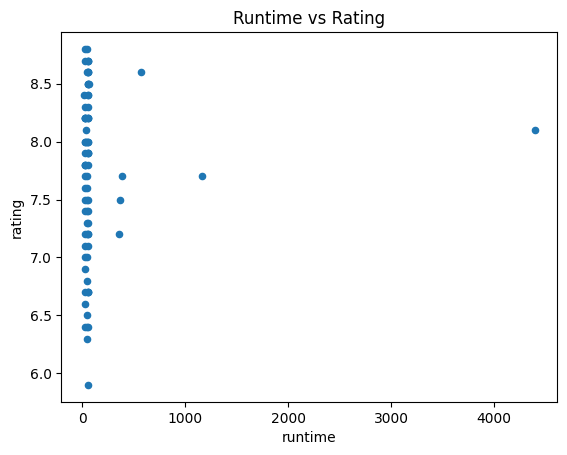

In [ ]:
sorted_df.plot( kind='scatter',x="runtime", y="rating", title='Runtime vs Rating')

<Axes: title={'center': 'Distribution of Rating'}, ylabel='Frequency'>

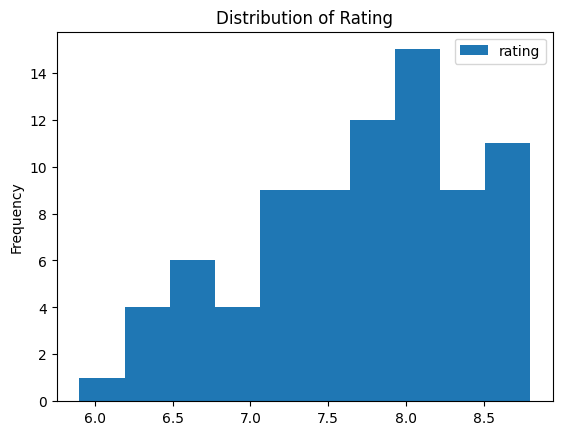

In [ ]:
sorted_df.plot( kind='hist', y="rating", title='Distribution of Rating')

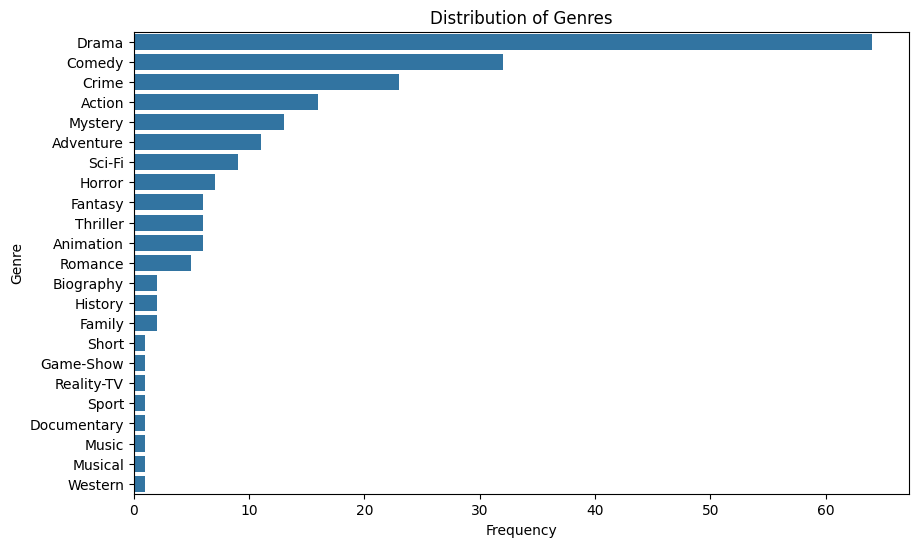

In [ ]:
# Splitting genres and creating a new DataFrame with separate genres
genres_df = df['genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
genres_df['genre'] = genres_df['genre'].str.strip()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))   # Set figure size
sns.countplot(data=genres_df, y='genre', order=genres_df['genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

# Saw how to do this with: https://www.kaggle.com/code/rawalmanish/most-watched-netflix-original-shows-tv-time